In [1]:
from IPython.display import Image

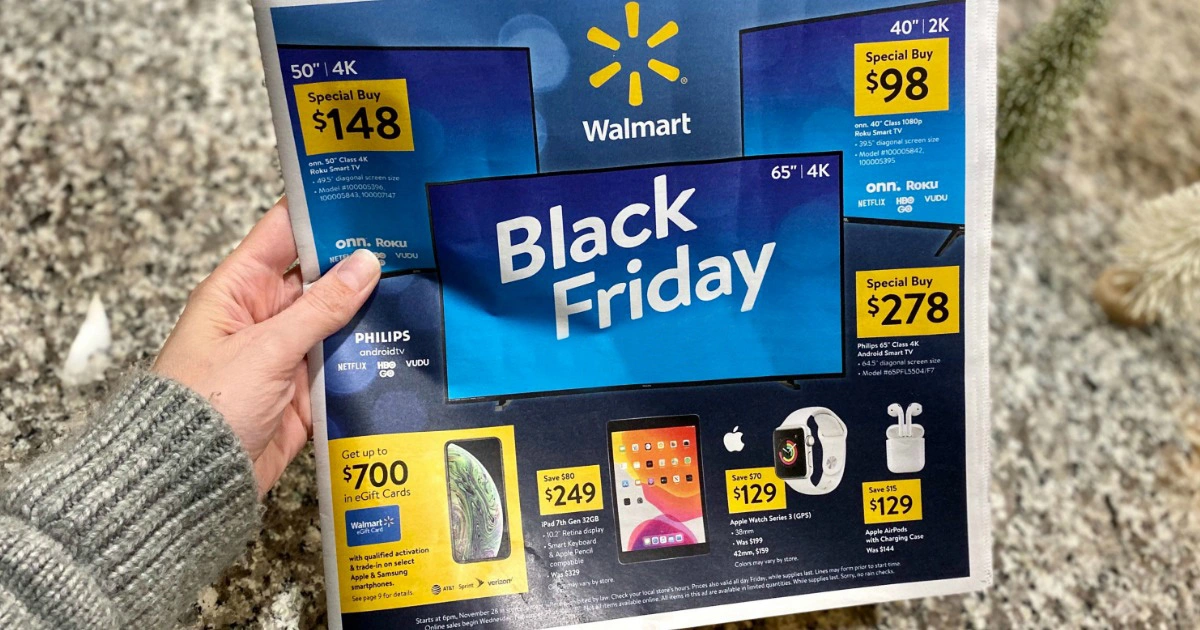

In [2]:
image_path = "walmart_black_friday.png"

Image(filename=image_path, width=1000, height=300)

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mlp                    
import matplotlib.pyplot as plt
import plotly.express as px 
import datasist as ds
#from pandas_profiling import ProfileReport
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [4]:
df_data = pd.read_csv('train.csv')

In [5]:
df_clean=df_data.copy()

In [6]:
#ProfileReport(df_data,title='black friday',html={'style':{'full_width':True}})

In [7]:
df_clean.head()

User_ID Product_ID Gender   Age  Occupation City_Category   
0  1000001  P00069042      F  0-17          10             A  \
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1   
0                          2               0                   3  \
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [8]:
df_clean.tail()

User_ID Product_ID Gender    Age  Occupation City_Category   
550063  1006033  P00372445      M  51-55          13             B  \
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1   
550063                          1               1                  20  \
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490

In [9]:
df_clean.shape

(550068, 12)

In [10]:
df_clean.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
df_clean['Product_ID']=df_clean['Product_ID'].str[1:]

covert datatype of column age to category .category variable are specific for represent data that has alimited number (range) 

In [13]:
df_clean['Age']=df_clean['Age'].astype('category')

In [14]:
df_clean['Stay_In_Current_City_Years']=df_clean['Stay_In_Current_City_Years'].astype('category')

In [15]:
df_clean['Product_ID']=df_clean['Product_ID'].astype('int64')

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  int64   
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  object  
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category_1          550068 non-null  int64   
 9   Product_Category_2          376430 non-null  float64 
 10  Product_Category_3          166821 non-null  float64 
 11  Purchase                    550068 non-null  int64   
dtypes: category(2), float64(2), int64(6), object(2)
memory usa

In [17]:
df_clean['Product_ID']

0          69042
1         248942
2          87842
3          85442
4         285442
           ...  
550063    372445
550064    375436
550065    375436
550066    375436
550067    371644
Name: Product_ID, Length: 550068, dtype: int64

In [18]:
df_clean.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [19]:
df_clean['Product_Category_2']=df_clean['Product_Category_2'].fillna(df_clean['Product_Category_2'].median())
df_clean['Product_Category_3']=df_clean['Product_Category_3'].fillna(df_clean['Product_Category_3'].median())

In [20]:
df_clean.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [21]:
df_clean.duplicated().sum()

0

In [22]:
customer_features=['Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status']

In [23]:
unique_users= df_clean[['User_ID'] + customer_features].drop_duplicates('User_ID').reset_index()
unique_users

index  User_ID Gender    Age  Occupation City_Category   
0          0  1000001      F   0-17          10             A  \
1          4  1000002      M    55+          16             C   
2          5  1000003      M  26-35          15             A   
3          6  1000004      M  46-50           7             B   
4          9  1000005      M  26-35          20             A   
...      ...      ...    ...    ...         ...           ...   
5886  185450  1004588      F  26-35           4             C   
5887  187076  1004871      M  18-25          12             C   
5888  221494  1004113      M  36-45          17             C   
5889  229480  1005391      M  26-35           7             A   
5890  243533  1001529      M  18-25           4             C   

     Stay_In_Current_City_Years  Marital_Status  
0                             2               0  
1                            4+               0  
2                             3               0  
3                             2               1  
4                             1               1  
...                         ...             ...  
5886                          0               0  
5887                          2               0  
5888                          3               0  
5889                          0               0  
5890                         4+               1  

[5891 rows x 8 columns]

In [24]:
df_clean.describe()

User_ID     Product_ID     Occupation  Marital_Status   
count  5.500680e+05  550068.000000  550068.000000   550068.000000  \
mean   1.003029e+06  174744.814667       8.076707        0.409653   
std    1.727592e+03  102746.516956       6.522660        0.491770   
min    1.000001e+06     142.000000       0.000000        0.000000   
25%    1.001516e+06   97142.000000       2.000000        0.000000   
50%    1.003077e+06  169742.000000       7.000000        0.000000   
75%    1.004478e+06  259142.000000      14.000000        1.000000   
max    1.006040e+06  375436.000000      20.000000        1.000000   

       Product_Category_1  Product_Category_2  Product_Category_3   
count       550068.000000       550068.000000       550068.000000  \
mean             5.404270            9.576434           13.596114   
std              3.936211            4.226025            2.352863   
min              1.000000            2.000000            3.000000   
25%              1.000000            8.000000           14.000000   
50%              5.000000            9.000000           14.000000   
75%              8.000000           14.000000           14.000000   
max             20.000000           18.000000           18.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000

In [25]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.


# any values that are outside the whiskers in the plot are considered outliers

In [26]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

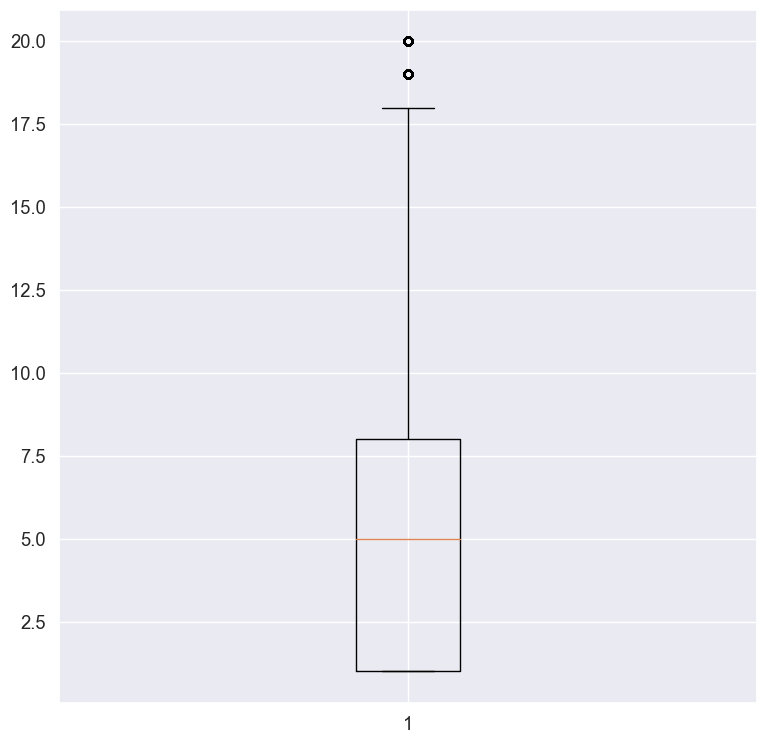

In [27]:
plt.boxplot(df_clean['Product_Category_1'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

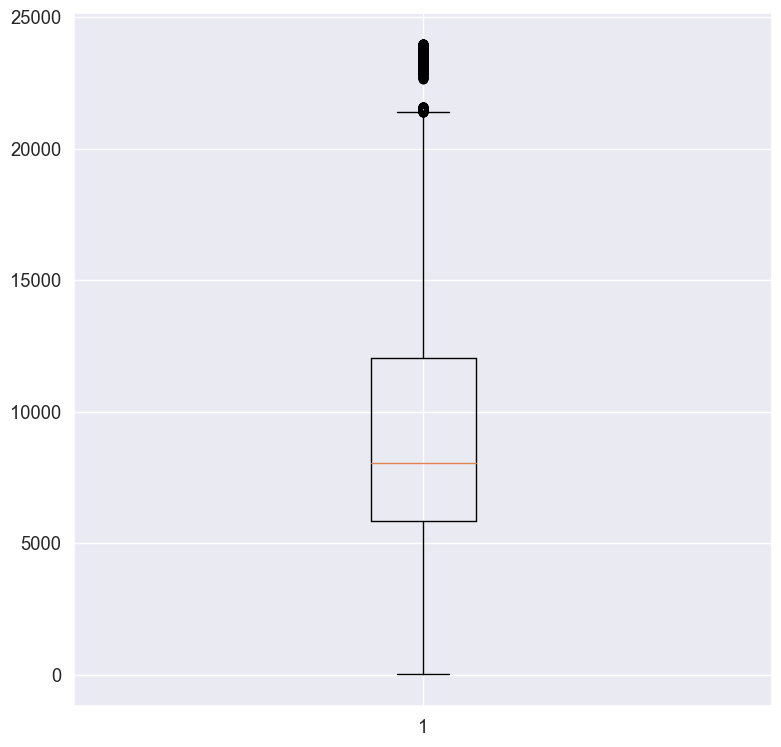

In [28]:
plt.boxplot(df_clean['Purchase'])
plt.show

<Axes: xlabel='Age', ylabel='Purchase'>

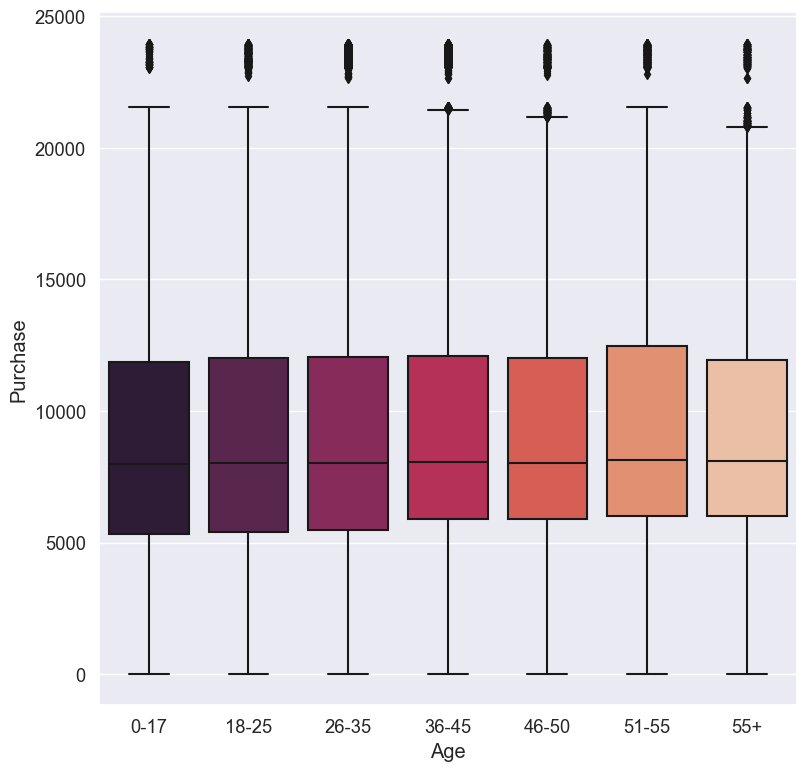

In [29]:

sns.boxplot(x='Age', y='Purchase', data=df_clean, palette='rocket')

<Axes: xlabel='Gender', ylabel='Purchase'>

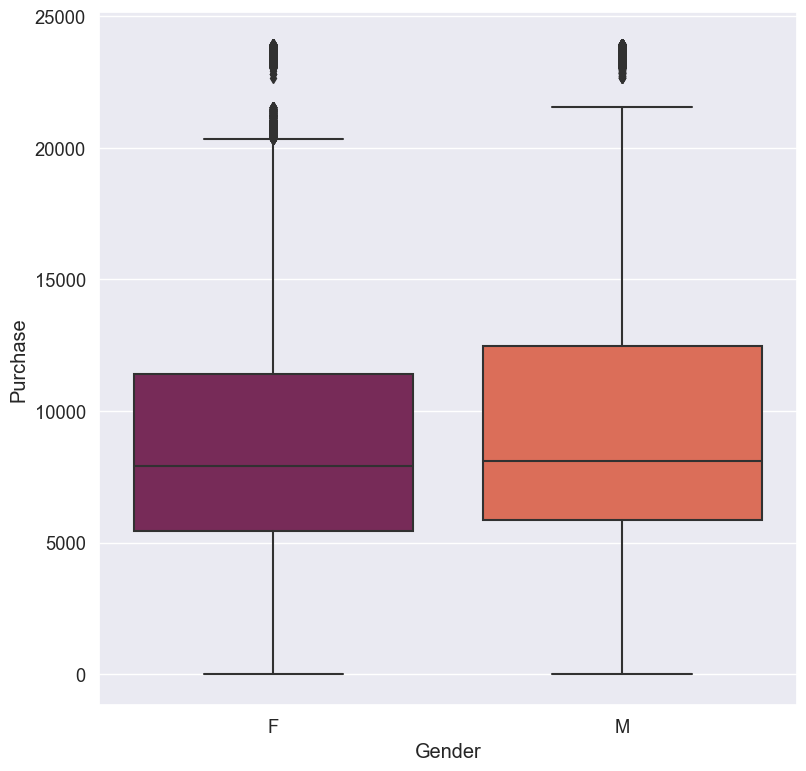

In [30]:
sns.boxplot(x='Gender', y='Purchase', data=df_clean, palette='rocket')

In [31]:
outliers_indices = ds.structdata.detect_outliers(df_clean, 0, df_clean.select_dtypes(include=['number']).columns)
df_clean.drop(outliers_indices, inplace=True)

In [32]:
df_clean.shape

(395486, 12)

# univariant

In [33]:
df_clean['Purchase'].describe()

count    395486.000000
mean       8314.013308
std        4492.198528
min         185.000000
25%        5366.000000
50%        7628.000000
75%        9913.000000
max       21399.000000
Name: Purchase, dtype: float64

In [34]:
df_clean['Purchase'].sum()

3288075867

In [35]:
df_clean['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [36]:
df_clean['Product_Category_2'].mode()[0]


9.0

In [37]:
df_clean['Gender'].unique()

array(['F', 'M'], dtype=object)

In [38]:
df_clean['Occupation'].unique()

array([10, 16, 15,  7, 20,  9, 12, 17,  1,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [39]:
df_clean['Stay_In_Current_City_Years'].unique()

['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+']

In [40]:
def cities(value):
    if '+' in value:
        value=value.replace('+','')
        return int(value)
    else:
        return int(value)

df_clean['Stay_In_Current_City_Years']=df_clean['Stay_In_Current_City_Years'].apply(cities)

In [41]:
df_clean['Product_Category_2'].unique()

array([ 9.,  6., 14.,  2., 15., 16., 11.,  8.,  5.,  4., 12., 17., 13.,
       10.,  7., 18.])

In [42]:
df_clean['Product_Category_3'].unique()

array([14.])

In [43]:
df_clean['Product_Category_3'].value_counts()

Product_Category_3
14.0    395486
Name: count, dtype: int64

In [44]:
df_clean['Purchase'].value_counts()

Purchase
7193     180
7011     180
6855     179
7185     172
6883     171
        ... 
13777      1
14965      1
2673       1
14725      1
349        1
Name: count, Length: 16481, dtype: int64

In [45]:
df_clean['Occupation'].value_counts()

Occupation
4     51472
0     50326
7     42695
1     35099
17    26768
20    25168
12    21219
2     19683
14    19579
16    18549
6     15034
3     13103
10     8787
5      8568
11     8524
15     8433
19     6214
13     5800
18     4775
9      4637
8      1053
Name: count, dtype: int64

In [46]:
df_clean['Marital_Status'].value_counts()

Marital_Status
0    232270
1    163216
Name: count, dtype: int64

married status -> 1
Whereas single status -> 0

In [47]:
df_clean[['User_ID','Marital_Status']].tail()

User_ID  Marital_Status
545909  1006040               0
545910  1006040               0
545911  1006040               0
545912  1006040               0
545913  1006040               0

In [48]:
df_clean['City_Category'].value_counts()

City_Category
B    167682
C    117836
A    109968
Name: count, dtype: int64

In [49]:
df_clean['Age'].value_counts()

Age
26-35    157974
36-45     79218
18-25     70349
46-50     33381
51-55     28113
55+       15998
0-17      10453
Name: count, dtype: int64

In [50]:
def ages(value):
    if '0-17' in value:
        value=value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value=value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value=value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value=value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value=value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value=value.replace('51-55','old')
        return str(value)
    else:
        value=value.replace('55+','old')
        return str(value)
df_clean['Age_cl']=df_clean['Age'].apply(ages)

Over here we have replaced the age groups according to the categories.
We have replaced numerical data into categorical data.
The types of categories are: child,adult,teenage and old.
0-17 -> child
18-25 -> teenage
26-35 -> adult
36-45 -> adult
46-50 -> adult
51-55 -> old
55+ -> old

In [51]:
df_clean.groupby('City_Category')['Purchase'].mean().reset_index()

City_Category     Purchase
0             A  8069.685609
1             B  8214.192966
2             C  8684.072567

In [52]:
def countplot(col, title):
    plt.figure(figsize=(8, 6))
    ax = plt.title(title, fontsize=16)
    ax = sns.countplot(data=df_clean, x=col)
    for label in ax.containers:
        ax.bar_label(label)

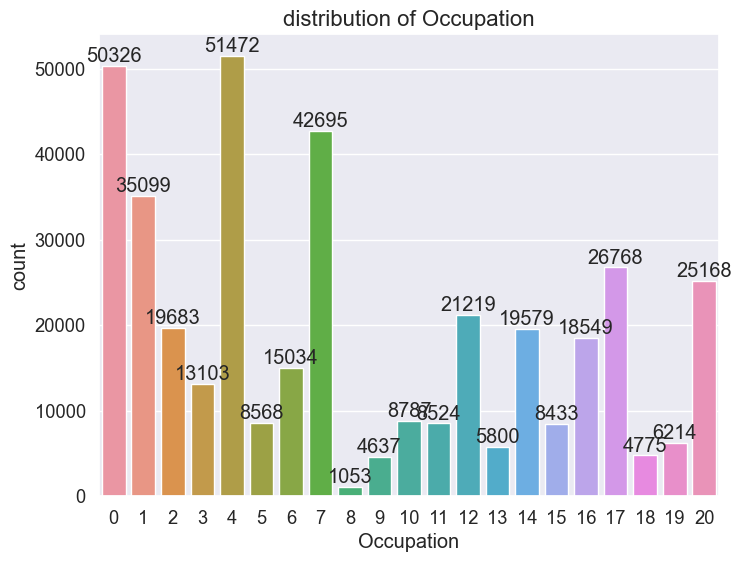

In [53]:
countplot('Occupation', 'distribution of Occupation')

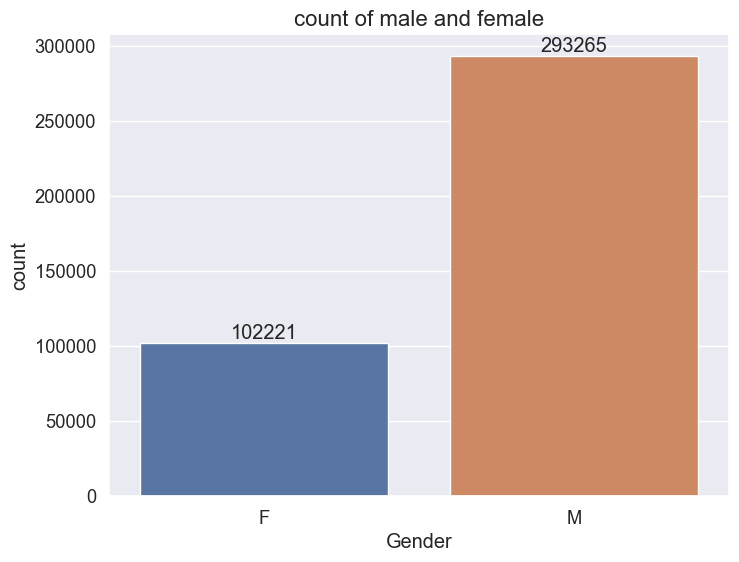

In [54]:
countplot('Gender', 'count of male and female')

The graph shows that count of male is more than female

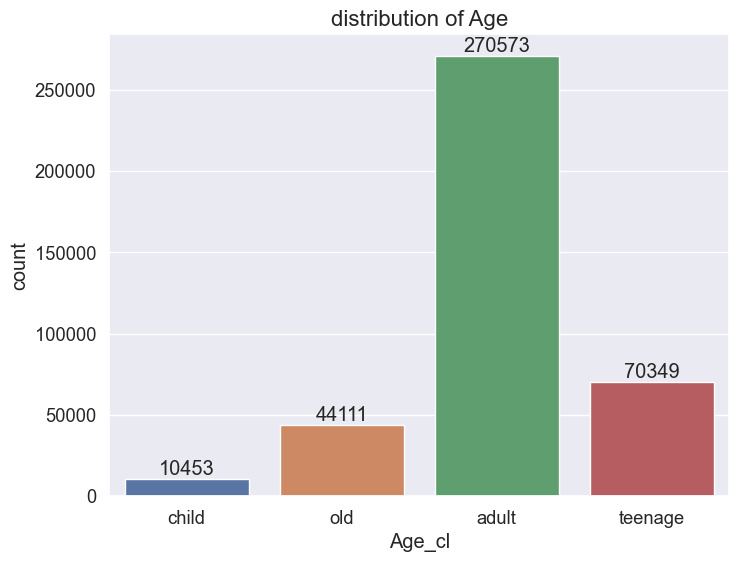

In [55]:
countplot('Age_cl', 'distribution of Age')

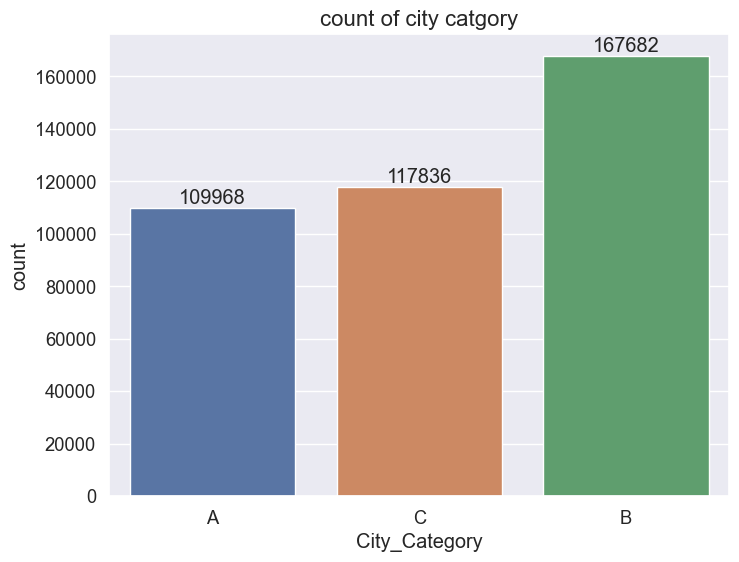

In [56]:
countplot('City_Category', 'count of city catgory')

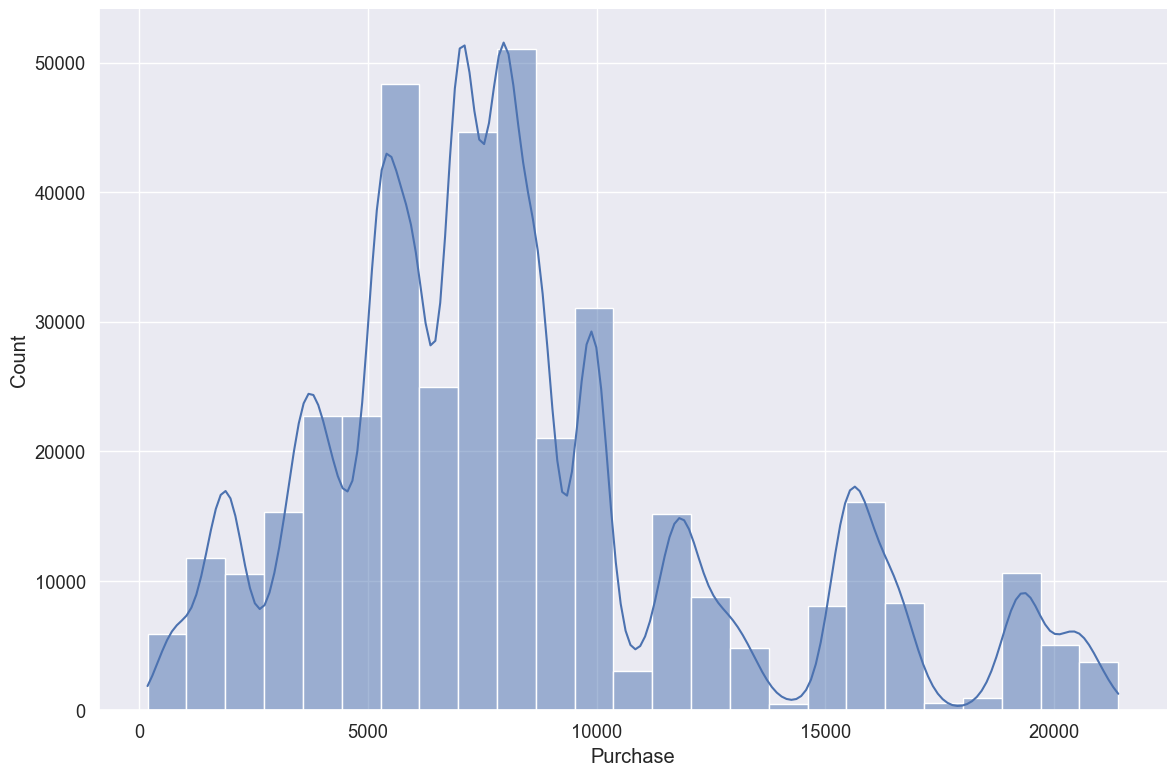

In [57]:
sns.displot(df_clean['Purchase'], bins=25, kde=True, height=8, aspect=1.5)

<Axes: xlabel='Marital_Status', ylabel='count'>

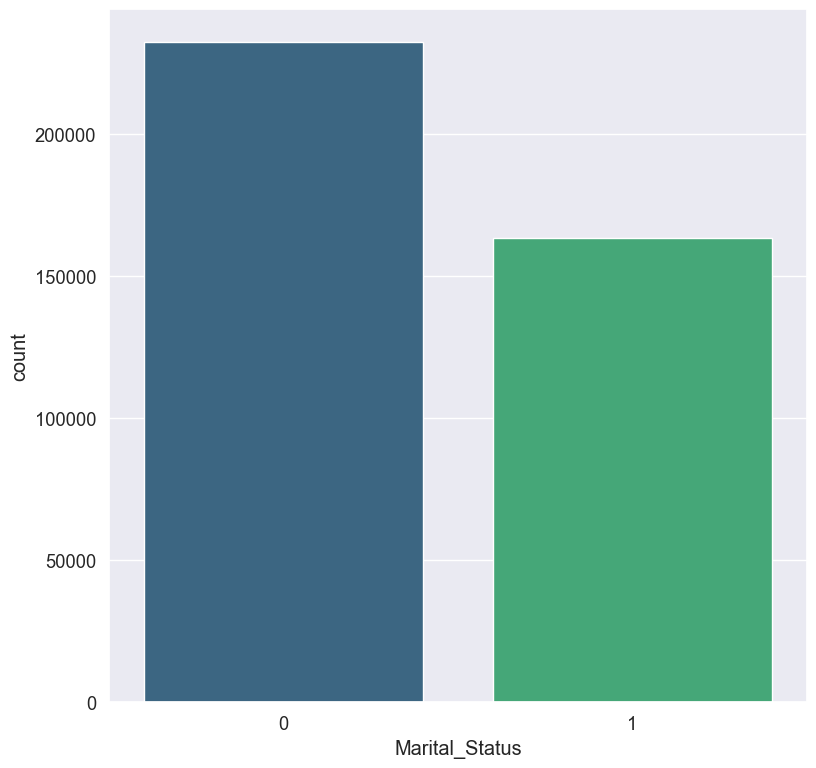

In [58]:
sns.countplot(x='Marital_Status', data=df_clean, palette='viridis')

# Bivariant

# what is the 5 top categories that have been purchased 

In [59]:
category_purchases = df_clean.groupby('Product_Category_1')['Purchase'].sum()

In [60]:
# Sort the categories by total purchase amount in descending order
category_purchases_sorted = category_purchases.sort_values(ascending=False)

In [61]:
# Print the top 5 categories by purchase amount
print(category_purchases_sorted.head(5))

Product_Category_1
5     875463637
8     789588025
1     746107538
6     210030469
16    145120612
Name: Purchase, dtype: int64


<Axes: xlabel='Product_Category_1', ylabel='count'>

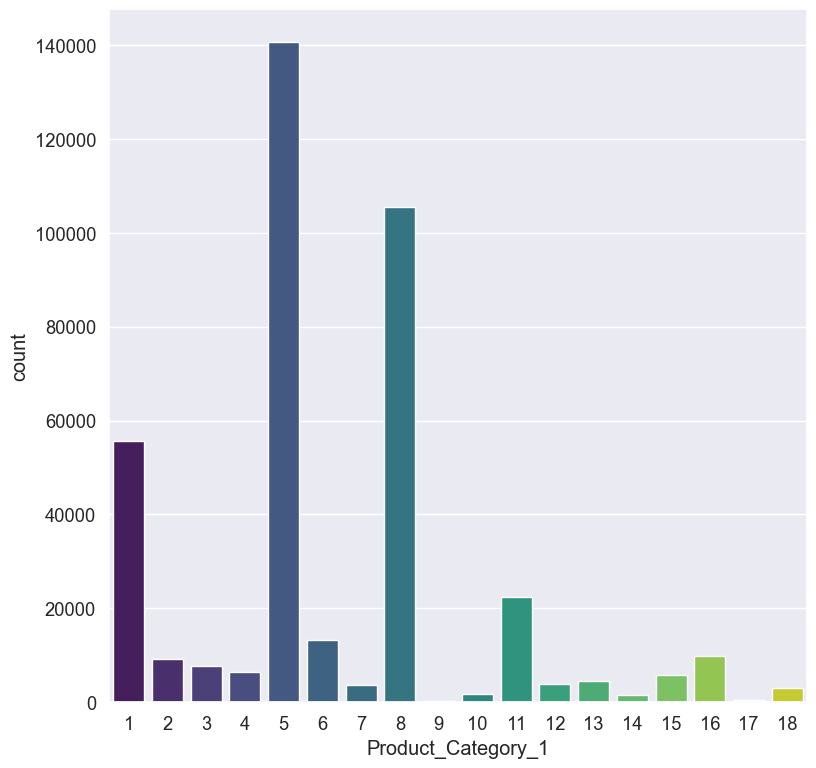

In [62]:
sns.countplot(x='Product_Category_1', data=df_clean, palette='viridis')

# What is the max and min  purchase for Product_Category_1 and Product_Category_2

In [63]:
df_clean.groupby(['Product_Category_1','Product_Category_2']).describe()['Purchase']

count          mean          std   
Product_Category_1 Product_Category_2                                      
1                  2.0                 9228.0  14339.460988  4284.327467  \
                   4.0                  161.0   7228.173913  3669.485353   
                   5.0                 2457.0  11032.673993  4382.686994   
                   6.0                 3008.0  13591.266622  4337.473054   
                   8.0                 6499.0  13696.932143  4301.806078   
...                                       ...           ...          ...   
15                 16.0                2512.0  12783.814889  4705.809604   
                   17.0                 647.0  18599.061824  3364.787793   
16                 9.0                 9828.0  14766.037037  4360.213198   
17                 9.0                  578.0  10170.759516  2333.993073   
18                 9.0                 3125.0   2972.864320   727.051652   

                                          min       25%      50%       75%   
Product_Category_1 Product_Category_2                                        
1                  2.0                 3793.0  11685.00  15411.0  19013.00  \
                   4.0                 3797.0   4213.00   4543.0   8270.00   
                   5.0                 3790.0   7882.00  11627.0  15309.00   
                   6.0                 3790.0  11522.00  15235.5  15823.00   
                   8.0                 3800.0  11553.50  15243.0  15838.00   
...                                       ...       ...      ...       ...   
15                 16.0                4150.0   8845.75  12883.5  16912.00   
                   17.0                4197.0  16928.50  20799.0  21133.50   
16                 9.0                 4036.0  12354.00  16292.5  16831.00   
17                 9.0                 2616.0   8063.50  10435.5  12776.75   
18                 9.0                  754.0   2359.00   3071.0   3769.00   

                                           max  
Product_Category_1 Product_Category_2           
1                  2.0                 19708.0  
                   4.0                 15794.0  
                   5.0                 19705.0  
                   6.0                 19708.0  
                   8.0                 19708.0  
...                                        ...  
15                 16.0                21398.0  
                   17.0                21393.0  
16                 9.0                 20971.0  
17                 9.0                 13264.0  
18                 9.0                  3900.0  

[95 rows x 8 columns]

# ***Is there a difference in purchase behavior between male and female customers? 

***Do male customers tend to spend more money overall, or are there certain products or categories that are more popular among female customers?

In [64]:
#calculate the total purchase amount for each gender 
gender_totals=df_clean.groupby('Gender')['Purchase'].sum()

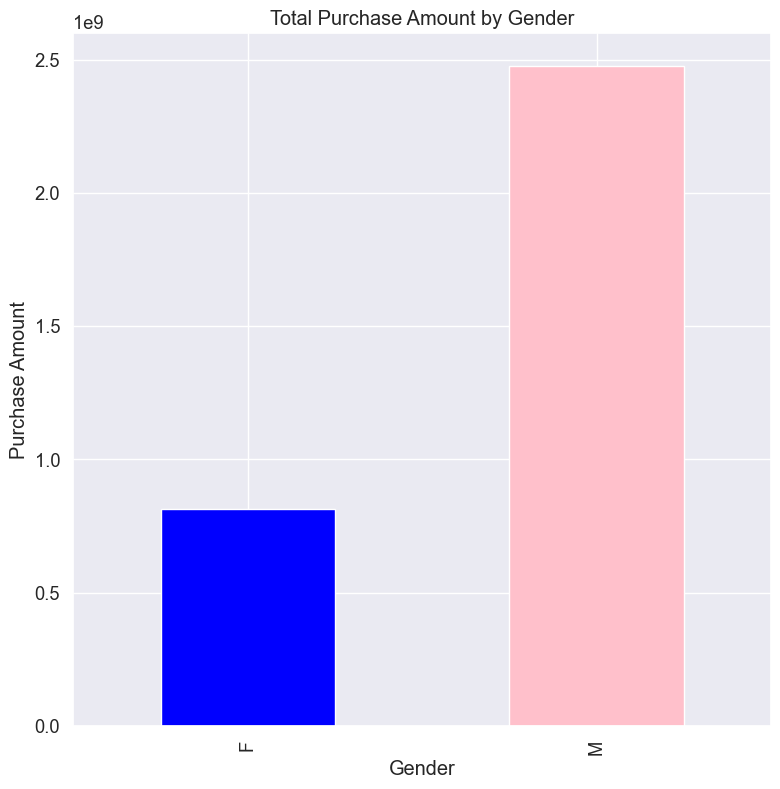

In [65]:
# Create a bar plot of the total purchase amount by gender
gender_totals.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

In [66]:
##calculate the average  purchase amount for each gender
gender_averages=df_clean.groupby('Gender')['Purchase'].mean()

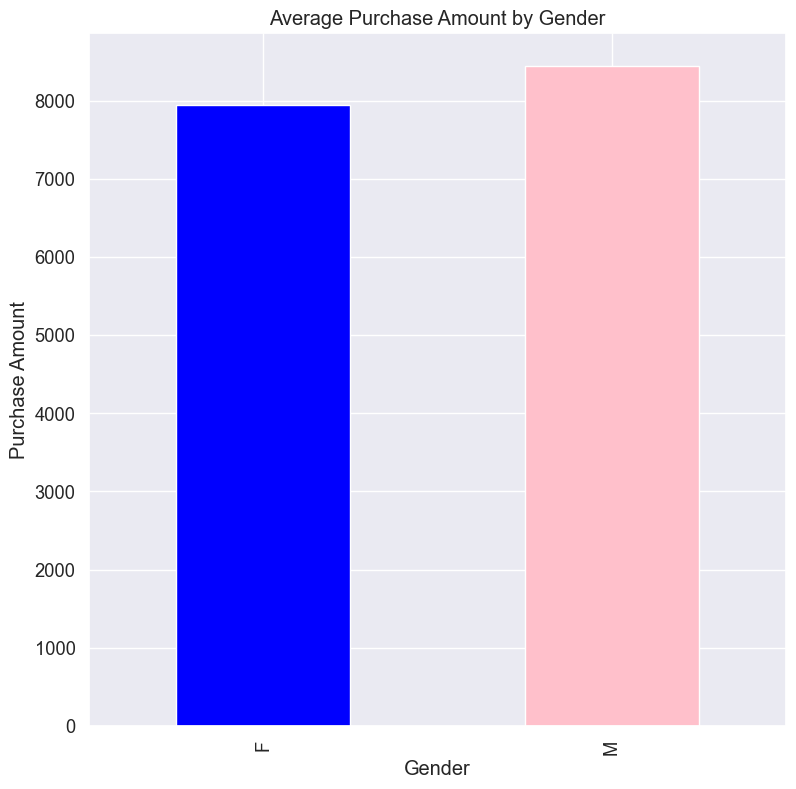

In [67]:
# Create a bar plot of the average purchase amount by gender
gender_averages.plot(kind='bar', color=['blue', 'pink'])
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

note :These visualizations suggest that there are differences in purchase behavior between male and female customers, with male customers tending to spend more money overall, but not necessarily more on average. Additionally, there are certain product categories that are more popular among female customers, while male customers also have popular product

# Is there a relationship between occupation and purchase amount?  

***Do customers in certain occupations tend to spend more money, or are there certain products or categories that are more popular among different

Calculate the total purchase amount for each occupation

In [68]:
# Calculate the average purchase amount for each occupation
occupation_averages = df_clean.groupby('Occupation')['Purchase'].sum()

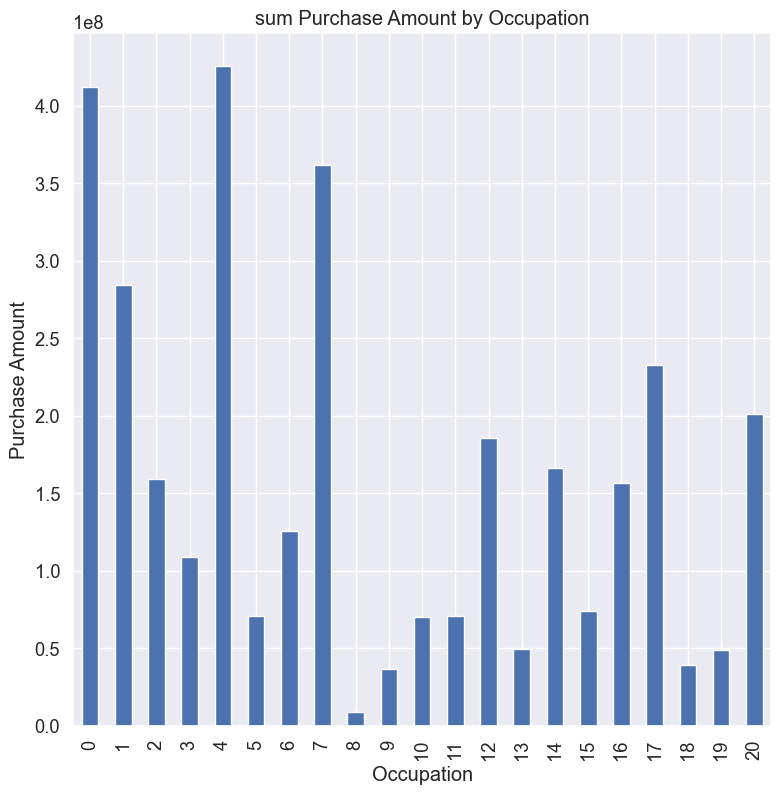

In [69]:
# Create a bar plot of the average purchase amount by occupation
occupation_averages.plot(kind='bar')
plt.title('sum Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.show()

note:The first plot shows that customers in certain occupations, such as occupation 4 and 0, tend to spend more money overall than customers in other occupations. The second plot shows that there is not a significant difference in the average purchase amount between different occupation groups.

#  Is there a difference in purchase behavior between customers from different cities?

 Do customers from certain cities tend to spend more money overall, or are there certain products or categories that are more popular in different cities?

In [70]:
# Calculate the total purchase amount for each city
city_totals = df_clean.groupby('City_Category')['Purchase'].sum()

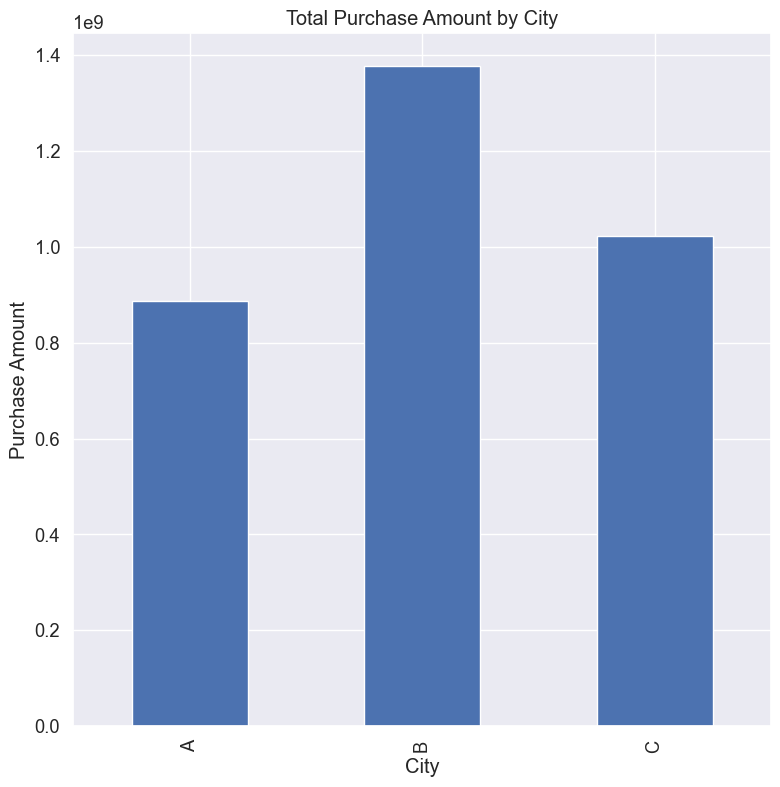

In [71]:
# Create a bar plot of the total purchase amount by city
city_totals.plot(kind='bar')
plt.title('Total Purchase Amount by City')
plt.xlabel('City')
plt.ylabel('Purchase Amount')
plt.show()

In [72]:
# Calculate the average purchase amount for each city
city_averages = df_clean.groupby('City_Category')['Purchase'].mean()

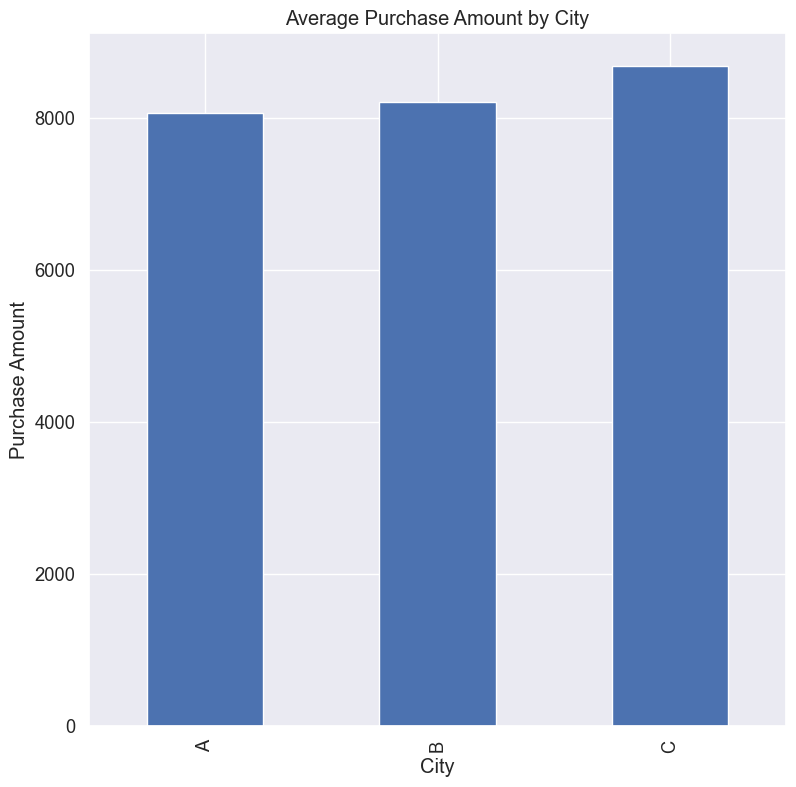

In [73]:

# Create a bar plot of the average purchase amount by city
city_averages.plot(kind='bar')
plt.title('Average Purchase Amount by City')
plt.xlabel('City')
plt.ylabel('Purchase Amount')
plt.show()

Note:second plot shows that customers from city category C tend to spend more money overall than customers from city categories A and B. The second plot shows that there is a slight difference in the average purchase amount between different cities, with customers from city category B having the highest average purchase amount

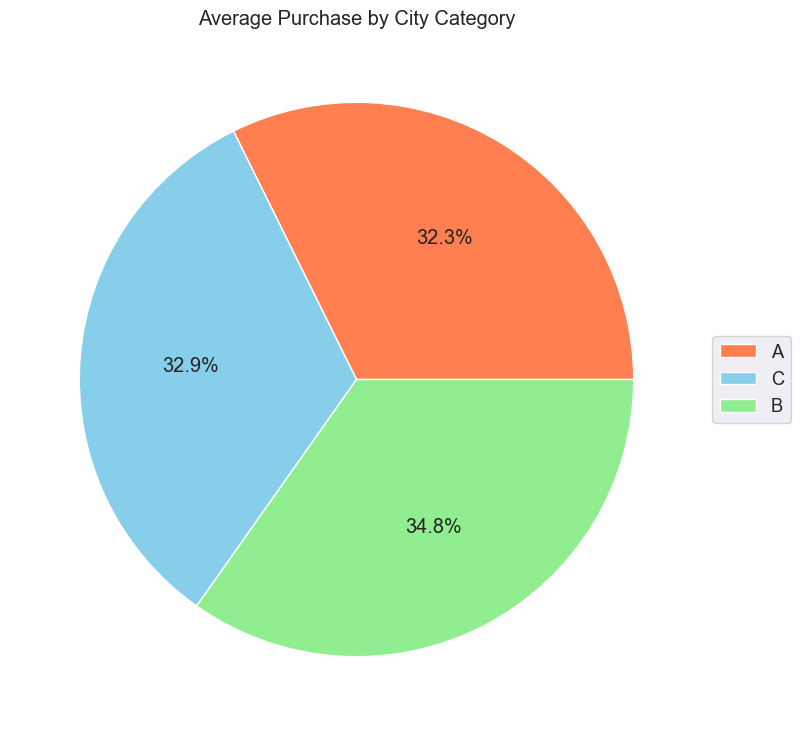

In [74]:
colors = ['coral', 'skyblue', 'lightgreen']

# Compute the average purchase by city category
avg_purchase = df_clean.groupby('City_Category')['Purchase'].mean()

# Create the pie chart with a custom color map
plt.pie(avg_purchase, colors=colors, autopct='%1.1f%%')

# Add a title and axis labels
plt.title('Average Purchase by City Category')
plt.ylabel('')

# Add a legend with the category labels
plt.legend(labels=df_clean['City_Category'].unique(), loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the pie chart
plt.show()

Age
Age          
0-17    10453
18-25   70349
26-35  157974
36-45   79218
46-50   33381
51-55   28113
55+     15998

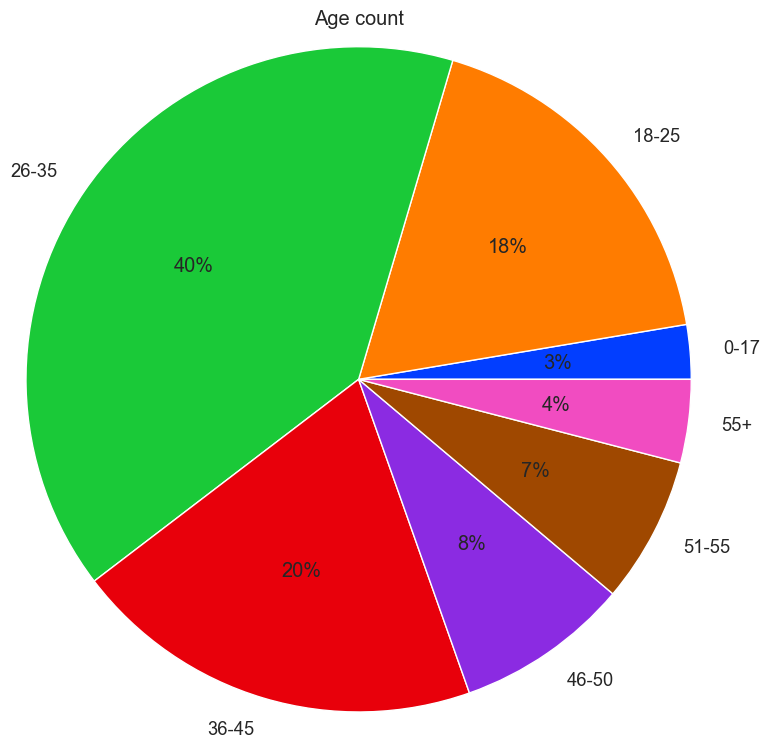

In [75]:
a=df_clean.groupby('Age')['Age'].agg('count')
display(a.to_frame())
plt.title('Age count')
palette_color=sns.color_palette('bright')
plt.pie(a, colors=palette_color,labels=a.index,radius=1.2,autopct='%.0f%%')
plt.show()

# Relation between Marital_Status and Purchase

In [76]:
grouped_data = df_clean.groupby("Marital_Status")["Purchase"].mean().reset_index()

# Create a bar chart showing average purchase amount by marital status
fig = px.bar(grouped_data, x="Marital_Status", y="Purchase", title="Average Purchase Amount by Marital Status")

# Display chart in Plotly
fig.show()

# Is there a relationship between product category and purchase amount by age and gender?

In [77]:
df_clean.groupby(['Age', 'Gender', 'Product_Category_1'])['Purchase'].mean().reset_index()

Age Gender  Product_Category_1      Purchase
0    0-17      F                   1  13583.569811
1    0-17      F                   2  10905.389313
2    0-17      F                   3  10050.221675
3    0-17      F                   4   2385.728302
4    0-17      F                   5   6368.295278
..    ...    ...                 ...           ...
247   55+      M                  14  13131.509804
248   55+      M                  15  14446.380952
249   55+      M                  16  15103.155280
250   55+      M                  17  10625.310345
251   55+      M                  18   2997.864078

[252 rows x 4 columns]

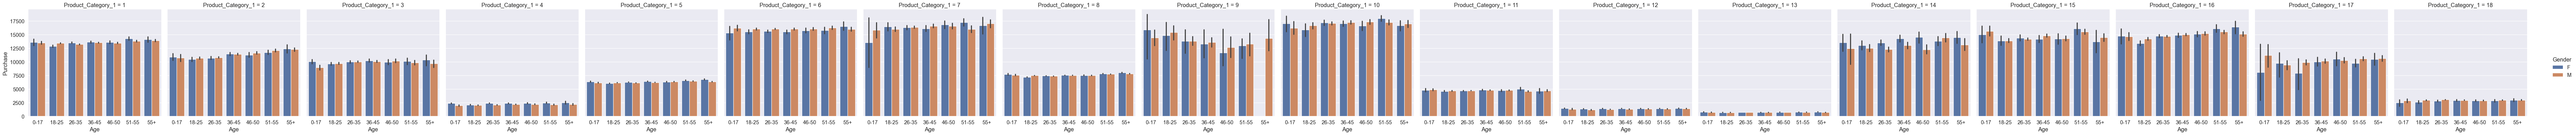

In [78]:
sns.catplot(data=df_clean, x='Age', y='Purchase',hue='Gender',col='Product_Category_1',kind='bar')

OBSERVATION:
    1-Purchase amount generally increases with age for product categories 1, 2, and 3...... 
    2-Product category 1 has the highest overall purchase amount
    3-Younger age groups tend to spend less overall: Across most product categories, younger age groups (e.g., 0-17 and 18-25) tend to have lower purchase amounts than older age groups

# Is there a relationship between occupation and purchase amount by age  and city category?

In [79]:
relationship_between_occupation_purchase=df_clean.groupby(['Age', 'City_Category', 'Occupation'])['Purchase'].mean().reset_index()

In [80]:
# Create an interactive scatter plot using Plotly
fig = px.scatter(relationship_between_occupation_purchase, x='Occupation', y='Purchase', color='Age', hover_data=['City_Category'])

# Set the title and axis labels
fig.update_layout(title='Relationship Between Occupation and Purchase by Age and City Category',
                  xaxis_title='Occupation',
                  yaxis_title='Average Purchase')

# Show the plot
fig.show()

This plot shows the relationship between occupation and purchase for each combination of age group and city category. We can see that there are some clear differences in purchasing behavior among different groups. For example, young adults (18-25) in city category A tend to spend more when their occupation is 0 or 4, while middle-aged adults (36-45) in city category C tend to spend more when their occupation is 1 or 7. This interactive plot allows the user to explore the data in more detail by zooming in and out, hovering over the points to see the exact values, and toggling the visibility of the age groups using the legend.

<Axes: xlabel='Occupation', ylabel='Purchase'>

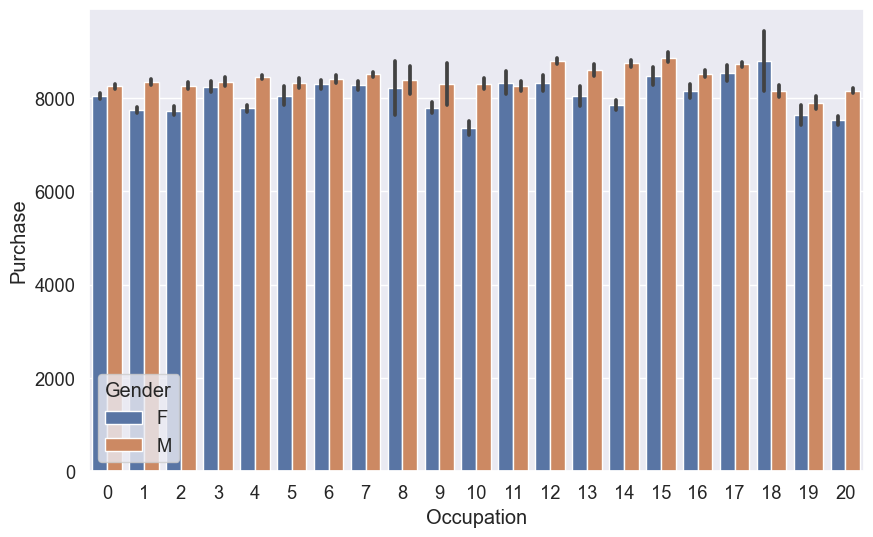

In [81]:
plt.figure(figsize=(10,6))
sns.barplot(x="Occupation",y="Purchase",data=df_clean, hue="Gender")

for all occupation purchase ammount is same
Ammount spent by male and female for all occupation is approx same

# Relation between Age ,Purchase,Gender

<Axes: xlabel='Age', ylabel='Purchase'>

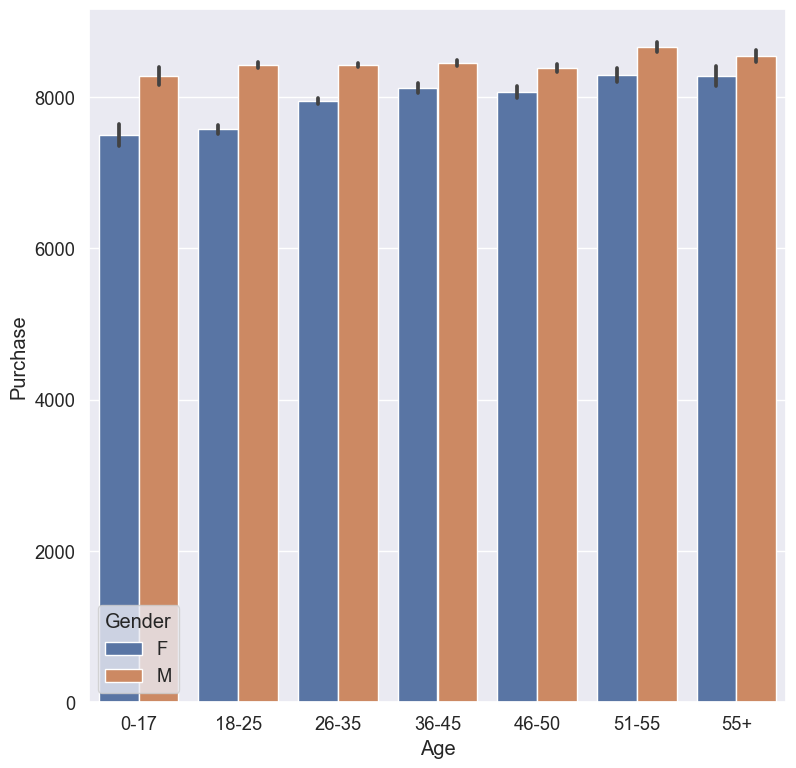

In [82]:
sns.barplot(x="Age",y="Purchase",data=df_clean,hue="Gender")

# Create a count plot of the product categories purchased by gender

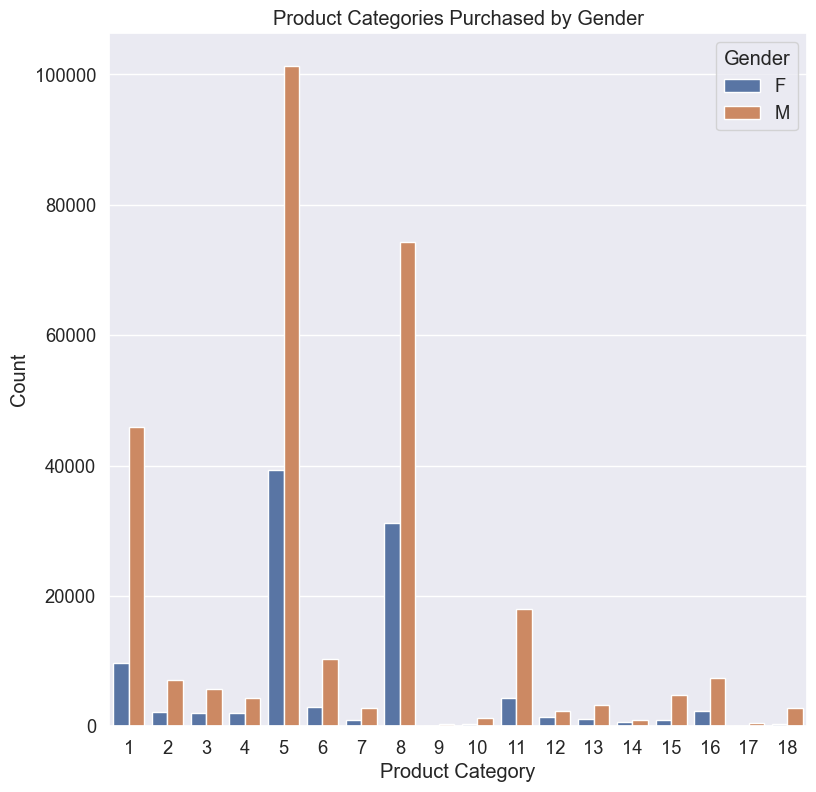

In [83]:
# Create a count plot of the product categories purchased by gender
sns.countplot(x='Product_Category_1', hue='Gender', data=df_clean)
plt.title('Product Categories Purchased by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

# Is there a difference in purchase between different city categories by gender and marital status?

In [84]:
purchase_matrial_city_catogries=df_clean.groupby(['City_Category', 'Gender', 'Marital_Status']).agg({'Purchase': 'mean', 'Product_ID': 'nunique'}).reset_index()

In [85]:
# Create an interactive grouped bar plot using Plotly
import plotly .graph_objs as go
fig = go.Figure(data=[
    go.Bar(name='Average Purchase', x=purchase_matrial_city_catogries['City_Category'] + ' - ' + purchase_matrial_city_catogries['Gender'] + ' - ' +purchase_matrial_city_catogries['Marital_Status'].astype(str), y=purchase_matrial_city_catogries['Purchase']),
    go.Bar(name='Number of Unique Products', x=purchase_matrial_city_catogries['City_Category'] + ' - ' + purchase_matrial_city_catogries['Gender'] + ' - ' +purchase_matrial_city_catogries['Marital_Status'].astype(str), y=purchase_matrial_city_catogries['Product_ID'])
])

fig.update_layout(title='Average Purchase and Number of Unique Products by City Category, Gender, and Marital Status',
                  xaxis_title='City Category, Gender, and Marital Status',
                  yaxis_title='Value')
fig.update_layout(barmode='group', legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1), height=600, width=1000)
fig.show()

# *is there a relation between product category and purchase amount by city 

In [86]:
df_clean.groupby(['City_Category','Product_Category_1'])['Purchase'].mean().reset_index()

City_Category  Product_Category_1      Purchase
0              A                   1  12850.001441
1              A                   2  10769.780546
2              A                   3   9995.802237
3              A                   4   2121.217614
4              A                   5   6103.529798
5              A                   6  15667.614958
6              A                   7  16239.243883
7              A                   8   7316.553669
8              A                   9  13811.663265
9              A                  10  16977.079470
10             A                  11   4609.766242
11             A                  12   1339.276031
12             A                  13    712.588554
13             A                  14  12616.948025
14             A                  15  14256.656782
15             A                  16  14261.713834
16             A                  17   9747.702479
17             A                  18   2939.503320
18             B                   1  13226.334045
19             B                   2  11109.319226
20             B                   3   9811.928827
21             B                   4   2186.573607
22             B                   5   6158.156043
23             B                   6  15891.619185
24             B                   7  16355.068793
25             B                   8   7449.141879
26             B                   9  14160.652778
27             B                  10  17075.034483
28             B                  11   4648.829889
29             B                  12   1332.885358
30             B                  13    723.834061
31             B                  14  12992.729430
32             B                  15  14216.469363
33             B                  16  14584.411590
34             B                  17  10191.273408
35             B                  18   2959.166307
36             C                   1  14094.998981
37             C                   2  11625.182383
38             C                   3   9970.586974
39             C                   4   2237.190418
40             C                   5   6446.417977
41             C                   6  16268.789592
42             C                   7  16557.659598
43             C                   8   7717.332353
44             C                   9  13417.763441
45             C                  10  17074.898276
46             C                  11   4933.621519
47             C                  12   1396.904721
48             C                  13    763.687865
49             C                  14  13986.680488
50             C                  15  14794.358343
51             C                  16  15503.533990
52             C                  17  10411.352632
53             C                  18   3017.775178

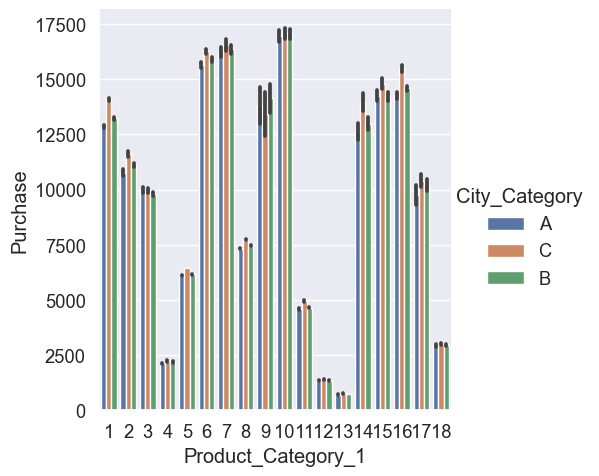

In [87]:
sns.catplot(data=df_clean, x='Product_Category_1', y='Purchase',hue='City_Category',kind='bar')

In [88]:
temp = df_clean.groupby(['Age', 'Gender', 'Marital_Status'])['Purchase'].mean().reset_index()\
    .sort_values(by=['Age',  'Purchase'], ascending=[1,1])
fig = px.bar(temp, x='Age', y='Purchase',color='Gender', facet_col='Marital_Status',
                                 barmode='group', title='Mean of Purchase')
# fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_yaxes(range=[7000, 10000])
fig.show()

In most age groups (besides ages 46-50), unmarried male customers have slightly higher mean purchase then married

# Do customers from certain city categories tend to purchase different product categories than customers from other city categories?

In [89]:
pivot_table = df_clean.pivot_table(values='Purchase', index=['City_Category', 'Product_Category_1'], columns=['Age', 'Occupation'], aggfunc='sum')
pivot_table

Age                                  0-17                                    
Occupation                             0       1       2  3       4  5  6    
City_Category Product_Category_1                                             
A             1                         0       0   97176  0       0  0  0  \
              2                         0       0   16006  0       0  0  0   
              3                         0       0   38084  0       0  0  0   
              4                         0       0       0  0       0  0  0   
              5                     37288       0  338981  0       0  0  0   
              6                         0       0       0  0       0  0  0   
              7                         0       0   28944  0       0  0  0   
              8                     37689       0  160351  0       0  0  0   
              9                         0       0       0  0       0  0  0   
              10                        0       0   14720  0       0  0  0   
              11                        0       0    7867  0       0  0  0   
              12                        0       0    4608  0       0  0  0   
              13                        0       0       0  0       0  0  0   
              14                    11639       0       0  0       0  0  0   
              15                        0       0    8536  0       0  0  0   
              16                        0       0       0  0       0  0  0   
              17                        0       0       0  0       0  0  0   
              18                        0       0    6154  0       0  0  0   
B             1                   1111069  156390       0  0   61562  0  0   
              2                    274512   59215       0  0       0  0  0   
              3                    403562   32347       0  0       0  0  0   
              4                     43680    7047       0  0       0  0  0   
              5                   1697853  286517       0  0   38333  0  0   
              6                    568357   37103       0  0   88763  0  0   
              7                    141140       0       0  0   12796  0  0   
              8                   2283082  292289       0  0  102786  0  0   
              9                     37563   18393       0  0       0  0  0   
              10                   108631       0       0  0       0  0  0   
              11                   155295   21125       0  0       0  0  0   
              12                        0    1379       0  0       0  0  0   
              13                     2468     761       0  0     962  0  0   
              14                     4015   44992       0  0       0  0  0   
              15                   115371   81474       0  0   20881  0  0   
              16                   262561   20805       0  0       0  0  0   
              17                        0       0       0  0   13243  0  0   
              18                     5327       0       0  0       0  0  0   
C             1                    933695  180351   19010  0   78106  0  0   
              2                    181221       0   23004  0       0  0  0   
              3                    226707   13356       0  0   19070  0  0   
              4                     52044    5650       0  0       0  0  0   
              5                   1542149  493493       0  0   99398  0  0   
              6                    453445   97770       0  0    4165  0  0   
              7                         0    4167       0  0       0  0  0   
              8                   1139893  231795   14224  0   83622  0  0   
              9                         0       0       0  0       0  0  0   
              10                        0       0       0  0       0  0  0   
              11                   336670   26119    6044  0   38102  0  0   
              12                    16013       0       0  0       0  0  0   
              13      

# Is there a correlation between the number of products purchased and the total purchase amount?

In [90]:
# Group the data by User_ID and calculate the total number of products purchased and the total purchase amount for each user
user_data = df_clean.groupby('User_ID').agg({'Product_ID': 'count', 'Purchase': 'sum'}).reset_index()
user_data

User_ID  Product_ID  Purchase
0     1000001          21    173215
1     1000002          55    535261
2     1000003          18    181837
3     1000004           6     97274
4     1000005          91    678756
...       ...         ...       ...
5886  1006036         421   3161330
5887  1006037          93    789922
5888  1006038           8     67137
5889  1006039          49    303122
5890  1006040         152   1286888

[5891 rows x 3 columns]

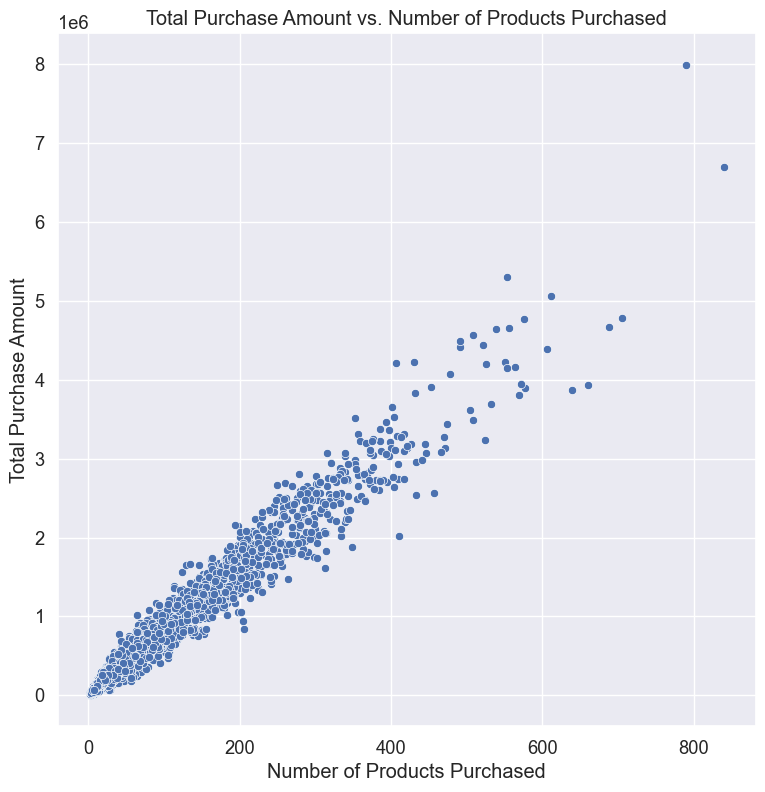

In [91]:
sns.scatterplot(x='Product_ID', y='Purchase', data=user_data)
plt.title('Total Purchase Amount vs. Number of Products Purchased')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Total Purchase Amount')
plt.show()

In [92]:
df_clean.head()

User_ID  Product_ID Gender   Age  Occupation City_Category   
0  1000001       69042      F  0-17          10             A  \
1  1000001      248942      F  0-17          10             A   
2  1000001       87842      F  0-17          10             A   
3  1000001       85442      F  0-17          10             A   
4  1000002      285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1   
0                          2               0                   3  \
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                          4               0                   8   

   Product_Category_2  Product_Category_3  Purchase Age_cl  
0                 9.0                14.0      8370  child  
1                 6.0                14.0     15200  child  
2                 9.0                14.0      1422  child  
3                14.0                14.0      1057  child  
4                 9.0                14.0      7969    old

In [93]:
df_clean.to_csv('df_clean.csv',index=False)

In [94]:
# Calculate the correlation between the number of products purchased and the total purchase amount
correlation = user_data['Product_ID'].corr(user_data['Purchase'])
correlation

0.9814904771907561

calculate the correlation coefficient between the number of products purchased and the total purchase amount using the `corr()` method. The correlation coefficient is a measure of the strength and direction of the relationship between two variables, and ranges from -1 to 1. In this case, the correlation coefficient is positive, suggesting that there is a positive correlation between the number of products purchased and the total purchase amount.

the correlation between age and purchase

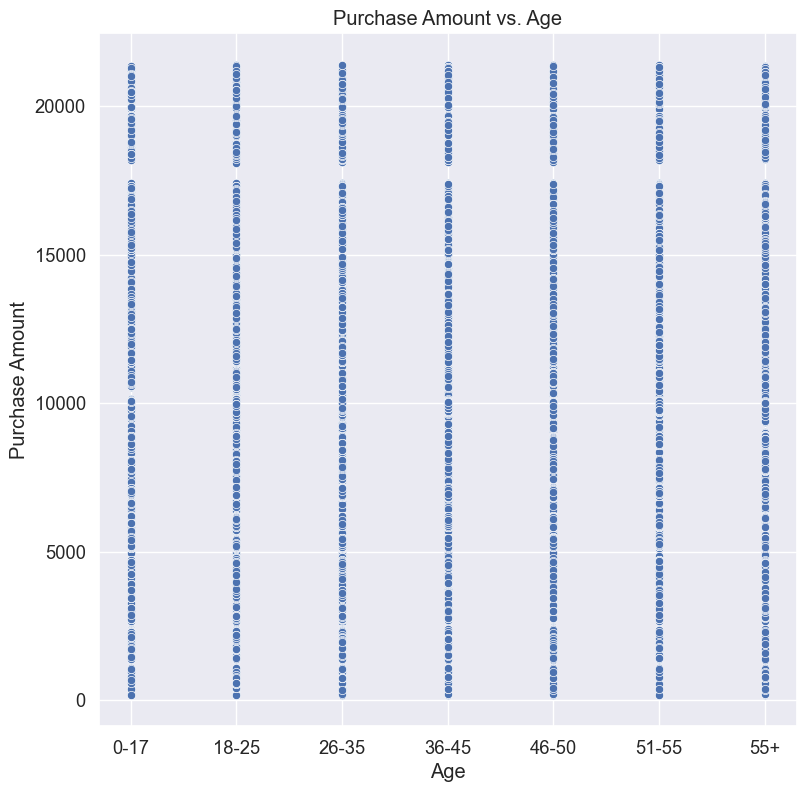

In [95]:
sns.scatterplot(x='Age', y='Purchase', data=df_clean)
plt.title('Purchase Amount vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

Note:The correlation coefficient is a measure of the strength and direction of the relationship between two variables, and ranges from -1 to 1. In this case, the correlation coefficient is relatively weak and positive, suggesting that there is a positive but not very strong correlation between age and purchase amount.

In [96]:
df_clean.groupby(['User_ID', 'Age'])['Purchase'].sum().reset_index()

User_ID    Age  Purchase
0      1000001   0-17    173215
1      1000001  18-25         0
2      1000001  26-35         0
3      1000001  36-45         0
4      1000001  46-50         0
...        ...    ...       ...
41232  1006040  26-35   1286888
41233  1006040  36-45         0
41234  1006040  46-50         0
41235  1006040  51-55         0
41236  1006040    55+         0

[41237 rows x 3 columns]

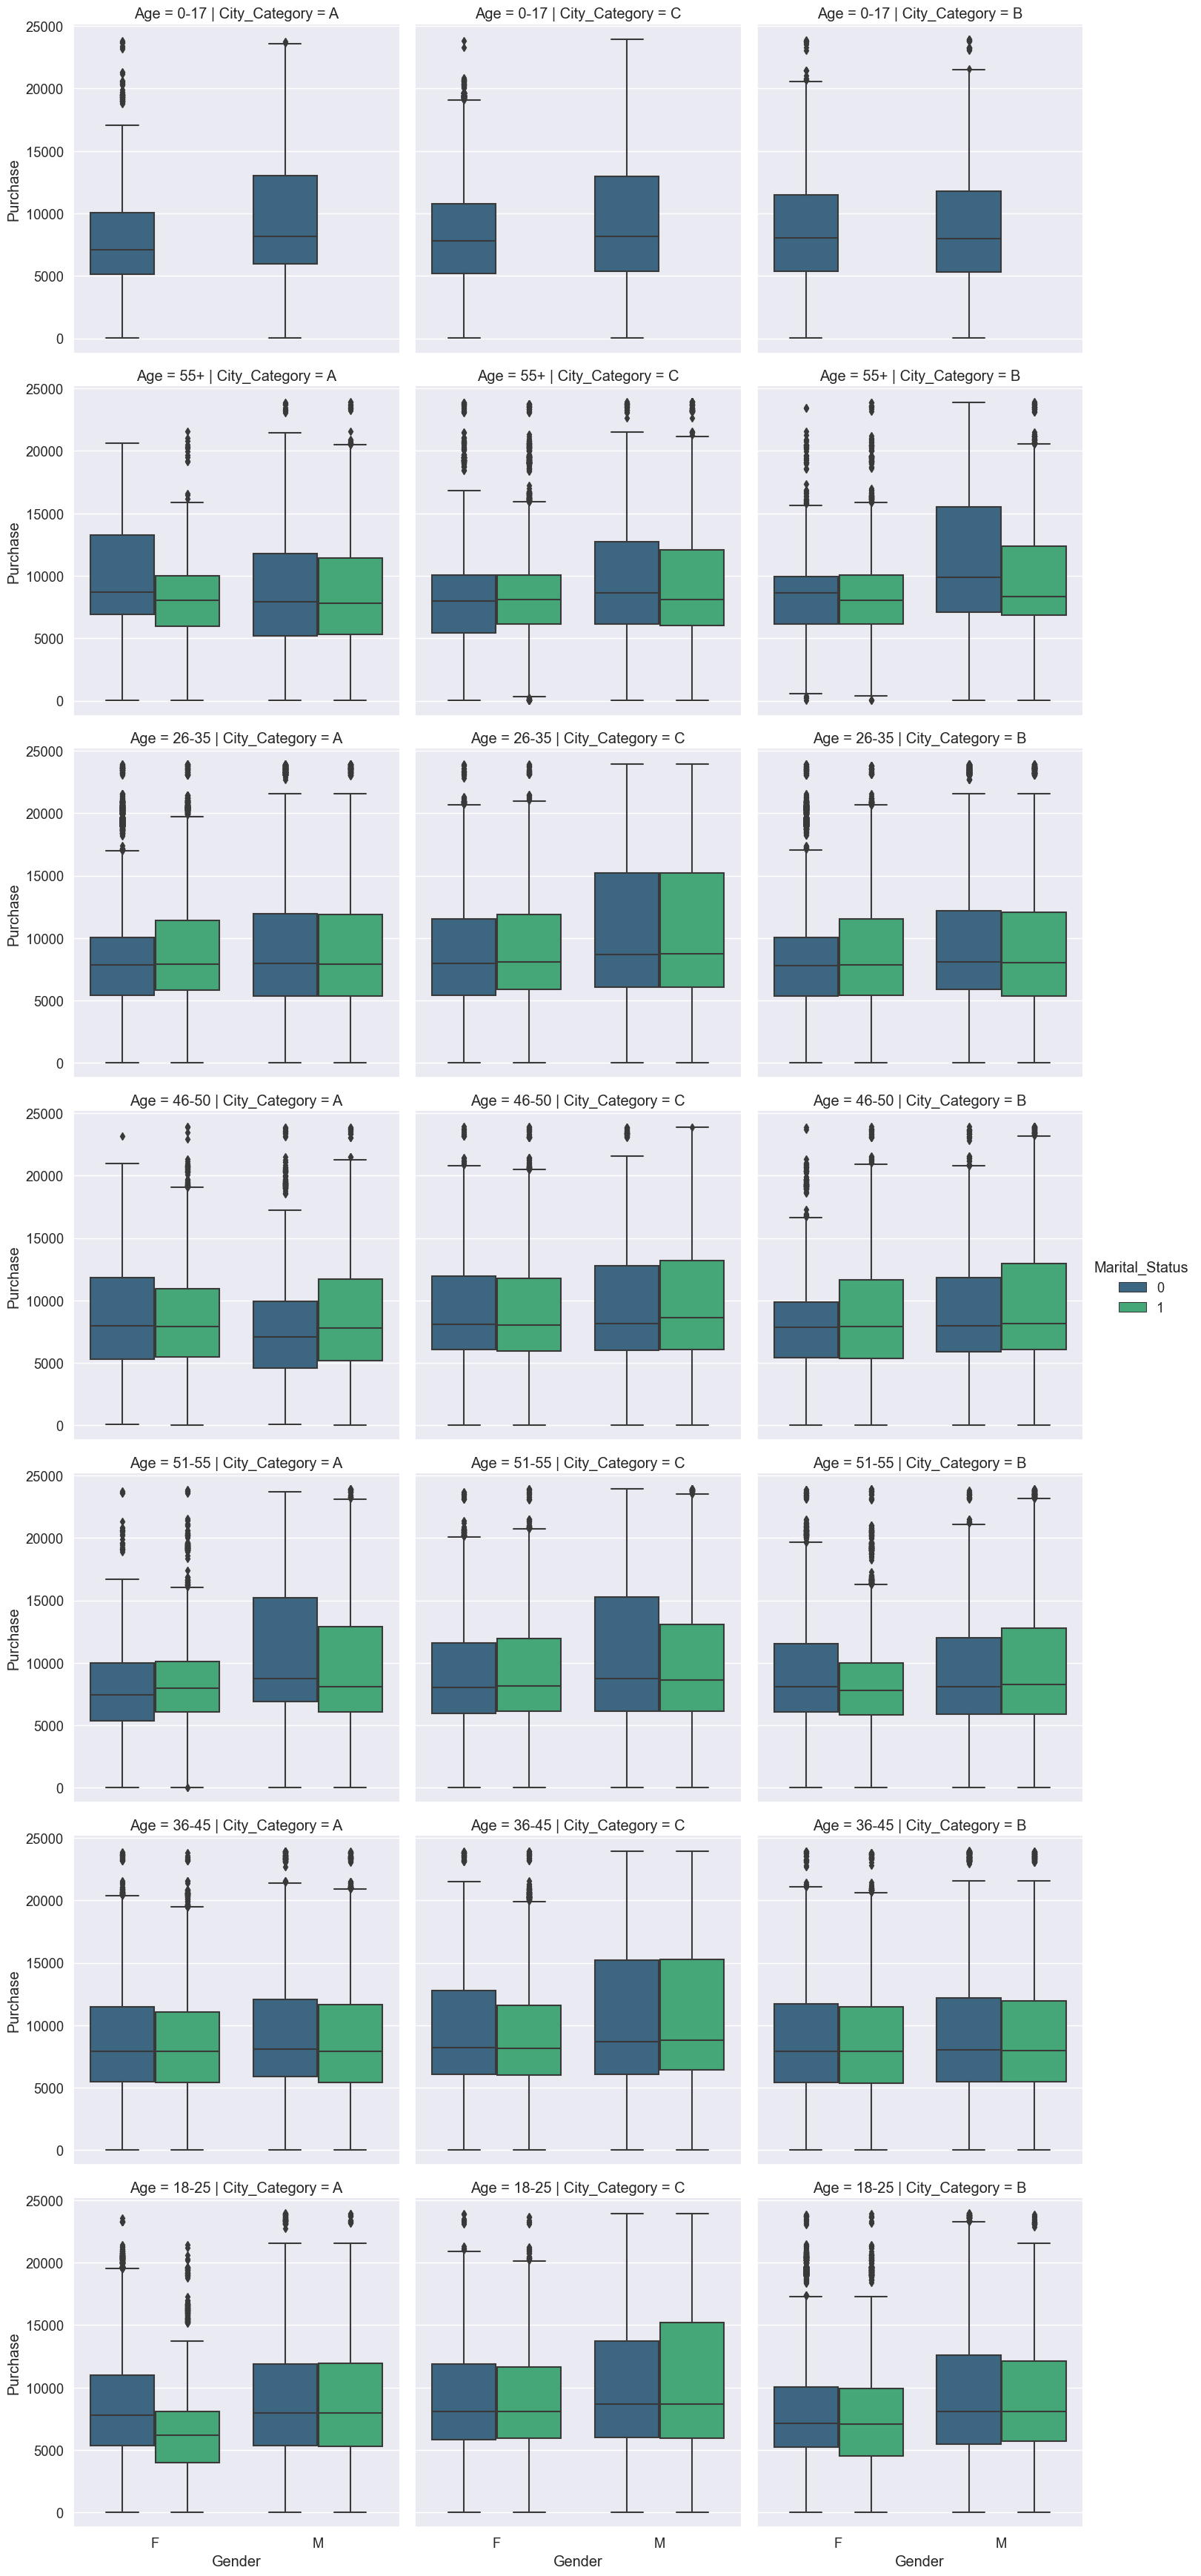

In [97]:
sns.catplot(kind='box', x='Gender', y='Purchase', data=df_data, palette='viridis', row='Age', col='City_Category', hue='Marital_Status')

You can see that the median Purchase value is generally higher for males (Gender=1) than for females (Gender=0), across all values of Age, City_Category, and Marital_Status.

The range of Purchase values is generally wider for males than for females, especially for younger age groups (Age < 45).


In [98]:
temp = df_clean.groupby(['Product_Category_1','Gender'])['Purchase'].mean()
temp = temp.reset_index()
fig = px.bar(temp, x='Product_Category_1', y='Purchase',color='Gender',barmode='group'
                                  ,title='Mean of Purchase')
# fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.update_xaxes(tickmode='linear')
fig.show()

Gender groups of customers who purchased Product_Category_1 have mostly similar mean values of Purchase

Female customers purchase noticeably more (on avarage) prodcuts 2, 3, 4, 9, 14

Male customers have distinctly higher mean of purchase for products 6, 17, 18

#### gender -----binary class---one hot encoding 
#### City_Category	----- multible class ----label encoding
### Stay_In_Current_City_Years ,age

If the values in the column stay_in_city_years are ordinal (meaning they have a specific order, such as "1 year", "2 years", "3 years", etc.), you could use the LabelEncoder to convert them to numerical values. Here's an example code snippet:

In [100]:
df_clean['Gender'] = df_clean['Gender'].replace({'F': 0, 'M': 1})


In [101]:
from sklearn.preprocessing import LabelEncoder

In [102]:
le=LabelEncoder()

In [103]:
df_clean['City_Category']=le.fit_transform(df_clean['City_Category'])

In [104]:
df_clean['Stay_In_Current_City_Years en']=le.fit_transform(df_clean['Stay_In_Current_City_Years'])

In [105]:
df_clean['Age'].unique()


['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [106]:
df_clean['Agenum'] = df_clean['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [107]:
df_clean.head()

User_ID  Product_ID  Gender   Age  Occupation  City_Category   
0  1000001       69042       0  0-17          10              0  \
1  1000001      248942       0  0-17          10              0   
2  1000001       87842       0  0-17          10              0   
3  1000001       85442       0  0-17          10              0   
4  1000002      285442       1   55+          16              2   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1   
0                          2               0                   3  \
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                          4               0                   8   

   Product_Category_2  Product_Category_3  Purchase Age_cl   
0                 9.0                14.0      8370  child  \
1                 6.0                14.0     15200  child   
2                 9.0                14.0      1422  child   
3                14.0                14.0      1057  child   
4                 9.0                14.0      7969    old   

   Stay_In_Current_City_Years en Agenum  
0                              2      1  
1                              2      1  
2                              2      1  
3                              2      1  
4                              4      7

deal with unbalance data

In [108]:
df_data['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [120]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# assuming `x_train` is your DataFrame with the `Age` column
# apply one-hot encoding on the `Age` column
x_train_encoded = pd.get_dummies(x_train, columns=['Age', 'Age_cl'])

# scale the encoded DataFrame using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x = df_clean.drop('Purchase', axis=1)
y = df_clean['Purchase']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)

In [121]:
df_clean.head()

User_ID  Product_ID  Gender   Age  Occupation  City_Category   
0  1000001       69042       0  0-17          10              0  \
1  1000001      248942       0  0-17          10              0   
2  1000001       87842       0  0-17          10              0   
3  1000001       85442       0  0-17          10              0   
4  1000002      285442       1   55+          16              2   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1   
0                          2               0                   3  \
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                          4               0                   8   

   Product_Category_2  Product_Category_3  Purchase Age_cl   
0                 9.0                14.0      8370  child  \
1                 6.0                14.0     15200  child   
2                 9.0                14.0      1422  child   
3                14.0                14.0      1057  child   
4                 9.0                14.0      7969    old   

   Stay_In_Current_City_Years en Agenum  
0                              2      1  
1                              2      1  
2                              2      1  
3                              2      1  
4                              4      7

a summary of the analysis performed on the Black Friday dataset:

1. *Data loading and cleaning*: Missing values in the `Product_Category_2` and `Product_Category_3` columns were imputed with median.

2. *Exploratory data analysis*: The distribution of the `Purchase` column was visualized using a histogram and boxplot, which showed a heavily skewed distribution with a relatively small number of high-value purchases driving the overall pattern in the data. Summary statistics such as the mean and median were also calculated to confirm this finding.

3. *Data preprocessing*: Label encoding was applied to the `City_Category`and 'age' and hot encoding on 'gender'  column to convert categorical labels to numerical values, and normalization was applied to the `Purchase` column using the `MinMaxScaler` class from scikit-learn to scale the data to a range of 0 to 1.

4. *Handling class imbalance*: Since the `Purchase` column is a continuous variable, the techniques for handling class imbalance that are commonly used for categorical variables may not be directly applicable. However, if the objective is to predict whether a purchase falls within a certain range (e.g., high-value purchases), we can create a binary target variable based on a threshold value and apply the techniques for handling class imbalance on the resulting binary variable. In this case, a binary variable indicating high-value purchases was created based on the 75th percentile of the `Purchase` column, which was imbalanced with the majority class (0) representing about 75% of the data and the minority class (1) representing about 25% of the data.
